In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [ ]:
#import dataset
pokemon=pd.read_csv("/content/drive/MyDrive/Data/Pokemon.csv")

In [ ]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
pokemon.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  8

In [ ]:
pokemon['Legendary'].value_counts()/np.float(len(pokemon))

<ipython-input-29-7bd287a70de1>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pokemon['Legendary'].value_counts()/np.float(len(pokemon))


False    0.91875
True     0.08125
Name: Legendary, dtype: float64

In [ ]:
#check the number of duplicated rows
df2 = len(pokemon)-len(pokemon.drop_duplicates())
print(df2)
#no duplicated rows

0


In [ ]:

for i in pokemon.drop("#",axis=1).columns:
    print('unique values in "{}":\n'.format(i),pokemon[i].unique())

unique values in "Name":
 ['Bulbasaur' 'Ivysaur' 'Venusaur' 'VenusaurMega Venusaur' 'Charmander'
 'Charmeleon' 'Charizard' 'CharizardMega Charizard X'
 'CharizardMega Charizard Y' 'Squirtle' 'Wartortle' 'Blastoise'
 'BlastoiseMega Blastoise' 'Caterpie' 'Metapod' 'Butterfree' 'Weedle'
 'Kakuna' 'Beedrill' 'BeedrillMega Beedrill' 'Pidgey' 'Pidgeotto'
 'Pidgeot' 'PidgeotMega Pidgeot' 'Rattata' 'Raticate' 'Spearow' 'Fearow'
 'Ekans' 'Arbok' 'Pikachu' 'Raichu' 'Sandshrew' 'Sandslash' 'Nidoran♀'
 'Nidorina' 'Nidoqueen' 'Nidoran♂' 'Nidorino' 'Nidoking' 'Clefairy'
 'Clefable' 'Vulpix' 'Ninetales' 'Jigglypuff' 'Wigglytuff' 'Zubat'
 'Golbat' 'Oddish' 'Gloom' 'Vileplume' 'Paras' 'Parasect' 'Venonat'
 'Venomoth' 'Diglett' 'Dugtrio' 'Meowth' 'Persian' 'Psyduck' 'Golduck'
 'Mankey' 'Primeape' 'Growlithe' 'Arcanine' 'Poliwag' 'Poliwhirl'
 'Poliwrath' 'Abra' 'Kadabra' 'Alakazam' 'AlakazamMega Alakazam' 'Machop'
 'Machoke' 'Machamp' 'Bellsprout' 'Weepinbell' 'Victreebel' 'Tentacool'
 'Tentacruel' 'Geod

In [ ]:
NanCount=pokemon.isnull().sum()
print(NanCount)

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [ ]:
total_rows = len(pokemon)
missing_rows = pokemon['Type 2'].isnull().sum()
percentage = (missing_rows / total_rows) * 100
print (percentage)

48.25


In [ ]:
df = pokemon.drop(['Name', 'Type 2'], axis=1)

In [ ]:
df

,#,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Grass,318,45,49,49,65,65,45,1,False
1,2,Grass,405,60,62,63,80,80,60,1,False
2,3,Grass,525,80,82,83,100,100,80,1,False
3,3,Grass,625,80,100,123,122,120,80,1,False
4,4,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,719,Rock,600,50,100,150,100,150,50,6,True
796,719,Rock,700,50,160,110,160,110,110,6,True
797,720,Psychic,600,80,110,60,150,130,70,6,True
798,720,Psychic,680,80,160,60,170,130,80,6,True


In [ ]:
# Perform binary encoding for "Legendary" column
legendary_encoder = LabelEncoder()
df['Legendary'] = legendary_encoder.fit_transform(df['Legendary'])

In [ ]:
# Perform binary encoding for "Legendary" column
legendary_encoder = LabelEncoder()
df['Type 1'] = legendary_encoder.fit_transform(df['Type 1'])

In [ ]:
df

,#,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,9,318,45,49,49,65,65,45,1,0
1,2,9,405,60,62,63,80,80,60,1,0
2,3,9,525,80,82,83,100,100,80,1,0
3,3,9,625,80,100,123,122,120,80,1,0
4,4,6,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
795,719,15,600,50,100,150,100,150,50,6,1
796,719,15,700,50,160,110,160,110,110,6,1
797,720,14,600,80,110,60,150,130,70,6,1
798,720,14,680,80,160,60,170,130,80,6,1


In [ ]:
X = df.drop(['Legendary'], axis=1)
y = df['Legendary']

In [ ]:
# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Train an SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Evaluate the model
accuracy = svm.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.975


In [ ]:
feature_weights = svm.coef_[0]

In [ ]:
weights_df = pd.DataFrame({'Feature': X.columns, 'Weight': feature_weights})

In [ ]:
weights_df.reindex(weights_df['Weight'].abs().sort_values(ascending=False).index)


,Feature,Weight
0,#,2.256068
9,Generation,-1.436843
2,Total,0.722079
8,Speed,0.709118
6,Sp. Atk,0.644369
7,Sp. Def,0.612812
5,Defense,0.502423
3,HP,0.216942
4,Attack,0.205487
1,Type 1,-0.061772


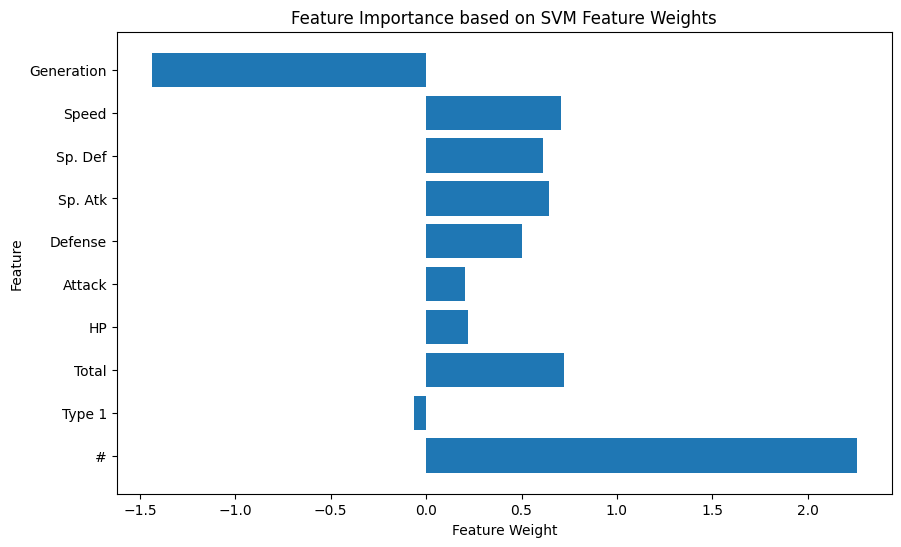

In [ ]:
# Plot the feature weights
plt.figure(figsize=(10, 6))
plt.barh(weights_df['Feature'], weights_df['Weight'])
plt.xlabel('Feature Weight')
plt.ylabel('Feature')
plt.title('Feature Importance based on SVM Feature Weights')
plt.show()